
Análisis exploratorio de datos (EDA): comenzar con un análisis básico para entender la distribución de las diferentes características, como géneros, popularidad de las canciones, y más.

Recomendación de canciones: construir un sistema de recomendación de canciones basado en las características de las canciones y los patrones de escucha/preferencias de los usuarios

Clasificación de géneros musicales: clasificar las canciones en diferentes géneros basándonos en sus características.

Análisis de tendencias a lo largo del tiempo: analizar cómo han cambiado las tendencias musicales a lo largo del tiempo.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df_spotify = pd.read_csv('/Users/alexvalles/dataset_spotify.csv')

df_spotify

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df_spotify.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [4]:
df_spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
df_spotify.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df_spotify.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
filas_con_nulos = df_spotify.isnull().any(axis=1)

# Mostrar las filas con al menos un valor nulo
print("Filas con al menos un valor nulo:")
df_spotify[filas_con_nulos]

Filas con al menos un valor nulo:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [8]:
# Eliminamos la fila

df_spotify = df_spotify.dropna()

In [9]:
df_spotify.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [10]:
df_spotify.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [11]:
count_artists = df_spotify['album_name'].unique()

count_artists

array(['Comedy', 'Ghost (Acoustic)', 'To Begin Again', ...,
       '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente',
       'Frecuencias Álmicas en 432hz (Solo Piano)', 'Revelation Songs'],
      dtype=object)

In [12]:

artistas = df_spotify['artists'].unique()
for artista in artistas:
    print(artista)


Gen Hoshino
Ben Woodward
Ingrid Michaelson;ZAYN
Kina Grannis
Chord Overstreet
Tyrone Wells
A Great Big World;Christina Aguilera
Jason Mraz
Jason Mraz;Colbie Caillat
Ross Copperman
Zack Tabudlo
Dan Berk
Anna Hamilton
Chord Overstreet;Deepend
Landon Pigg
Andrew Foy;Renee Foy
Boyce Avenue;Bea Miller
Boyce Avenue;Jennel Garcia
Brandi Carlile;Sam Smith
KT Tunstall
Brandi Carlile
Eddie Vedder
Brandi Carlile;Lucius
Highland Peak
Motohiro Hata
Andrew Belle
Ron Pope
Adam Christopher
Aron Wright
Sara Bareilles
Kurt Cobain
Tim Halperin
Canyon City
Aaron Espe
Tyler Ward
Five For Fighting
Bailey Jehl
Ingrid Michaelson
A Great Big World
Eddie Vedder;Nusrat Fateh Ali Khan
Drew Holcomb & The Neighbors
Gabrielle Aplin
The Civil Wars
Callum J Wright
Boyce Avenue;Fifth Harmony
Boyce Avenue
Gabrielle Aplin;JP Cooper
Mone Kamishiraishi
John Adams
Kitri
Augustana
Matthew Perryman Jones
Ray LaMontagne;Sierra Ferrell
Meg Birch
Catherine Feeny
Joshua Hyslop
JJ Heller
Howie Day
Ben Rector
Matt Nathanson
Rachael

In [13]:
# df_spotify['artists'] = df_spotify['artists'].map(lambda x: x.strip("[]").replace("'",""))


In [14]:

num_artistas_unicos = df_spotify['artists'].nunique()
print(f'Hay {num_artistas_unicos} artistas diferentes.')


Hay 31437 artistas diferentes.


In [15]:
df_spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [16]:

df_spotify = df_spotify.drop(['track_id', 'explicit'], axis=1)

df_spotify




,Unnamed: 0,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,Michael W. Smith,Change Your World,Friends,41,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


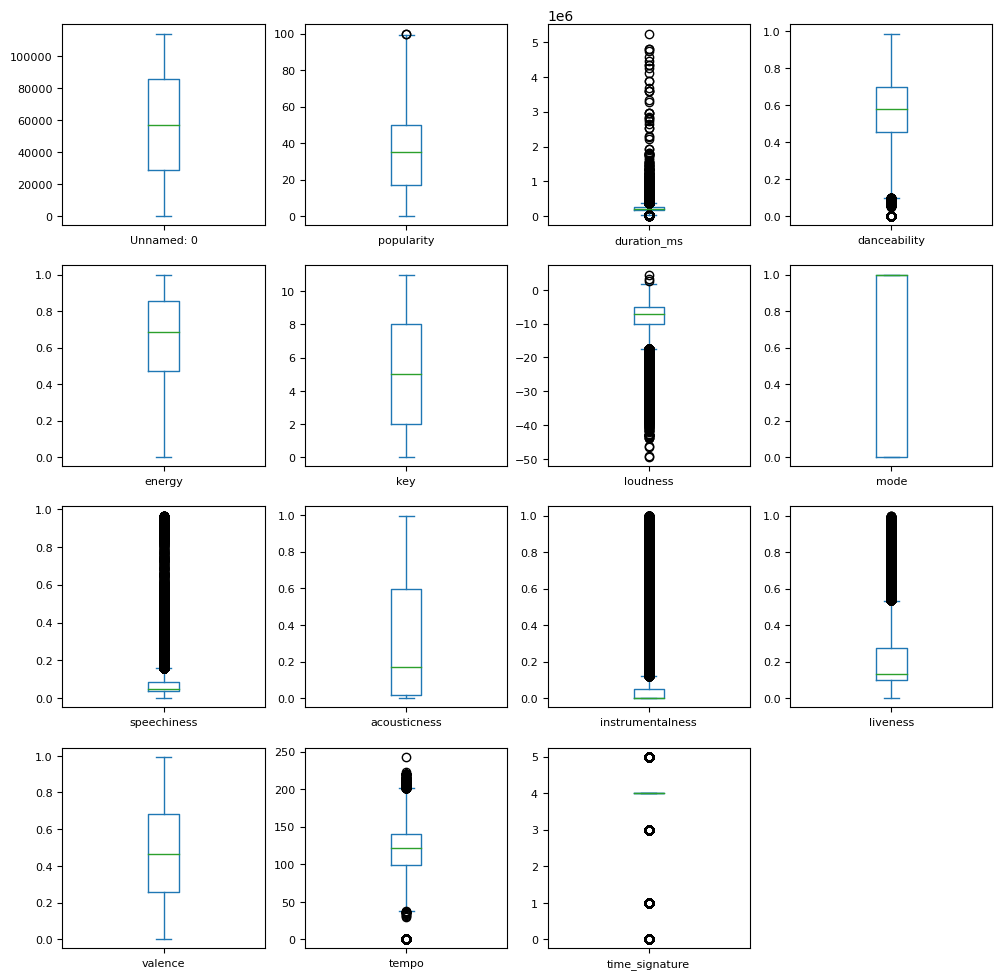

In [17]:
df_spotify.plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

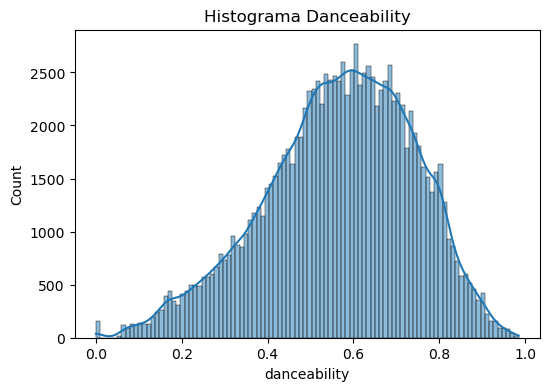

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['danceability'], kde=True)
plt.title('Histograma Danceability')
plt.show()

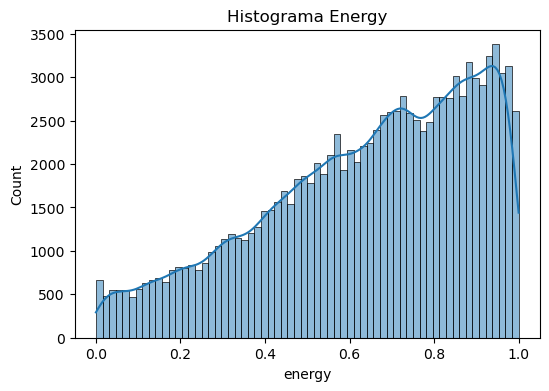

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['energy'], kde=True)
plt.title('Histograma Energy')
plt.show()

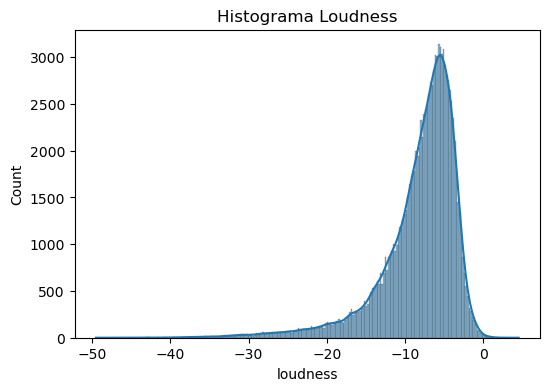

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['loudness'], kde=True)
plt.title('Histograma Loudness')
plt.show()

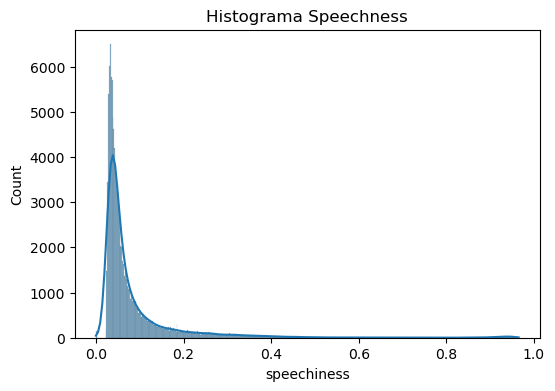

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['speechiness'], kde=True)
plt.title('Histograma Speechness')
plt.show()

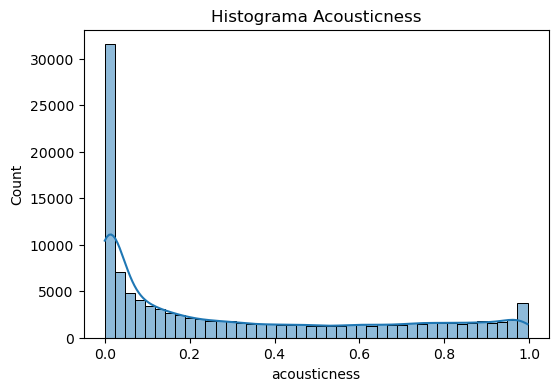

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['acousticness'], kde=True)
plt.title('Histograma Acousticness')
plt.show()

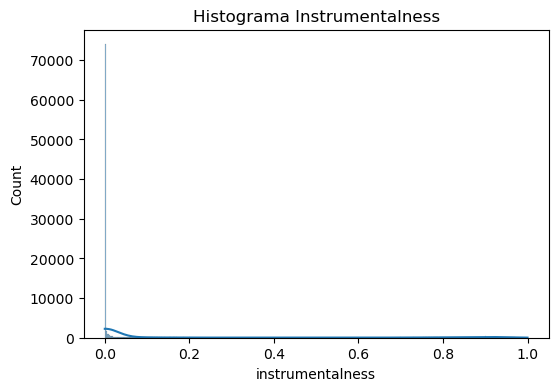

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['instrumentalness'], kde=True)
plt.title('Histograma Instrumentalness')
plt.show()

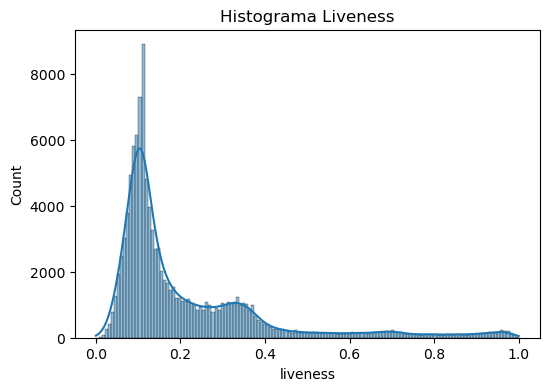

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['liveness'], kde=True)
plt.title('Histograma Liveness')
plt.show()

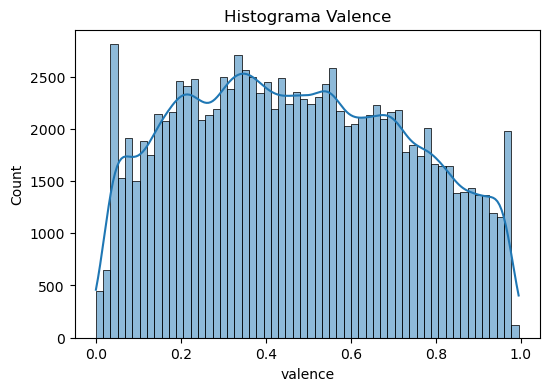

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['valence'], kde=True)
plt.title('Histograma Valence')
plt.show()

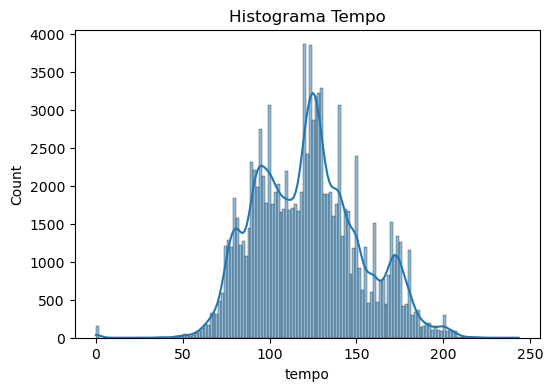

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(df_spotify['tempo'], kde=True)
plt.title('Histograma Tempo')
plt.show()

In [27]:
# TEST SHAPIRO

import pandas as pd
from scipy.stats import shapiro

columnas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Realiza el test de Shapiro-Wilk para cada columna
for column in columnas:
    stat, p = shapiro(df_spotify[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')


Columna: danceability, Estadística: 0.987, p-valor: 0.000
Columna: energy, Estadística: 0.946, p-valor: 0.000
Columna: key, Estadística: 0.930, p-valor: 0.000


Columna: loudness, Estadística: 0.838, p-valor: 0.000
Columna: mode, Estadística: 0.610, p-valor: 0.000
Columna: speechiness, Estadística: 0.514, p-valor: 0.000
Columna: acousticness, Estadística: 0.836, p-valor: 0.000
Columna: instrumentalness, Estadística: 0.546, p-valor: 0.000
Columna: liveness, Estadística: 0.736, p-valor: 0.000
Columna: valence, Estadística: 0.969, p-valor: 0.000
Columna: tempo, Estadística: 0.987, p-valor: 0.000


P- value menor que 0.05 indica que debemos rechazar la hipótesis nula, es decir, los datos no provienen de una distribución normal.

In [28]:
from scipy.stats import anderson

# test de Anderson-Darling para la columna 'danceability'
result = anderson(df_spotify['danceability'])

print(f'Estadística: {result.statistic:.5f}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'A un nivel de significancia del {sl}%, los datos parecen ser normales (estadística < valor crítico).')
    else:
        print(f'A un nivel de significancia del {sl}%, los datos no parecen ser normales (estadística > valor crítico).')

Estadística: 332.90269
A un nivel de significancia del 15.0%, los datos no parecen ser normales (estadística > valor crítico).
A un nivel de significancia del 10.0%, los datos no parecen ser normales (estadística > valor crítico).
A un nivel de significancia del 5.0%, los datos no parecen ser normales (estadística > valor crítico).
A un nivel de significancia del 2.5%, los datos no parecen ser normales (estadística > valor crítico).
A un nivel de significancia del 1.0%, los datos no parecen ser normales (estadística > valor crítico).


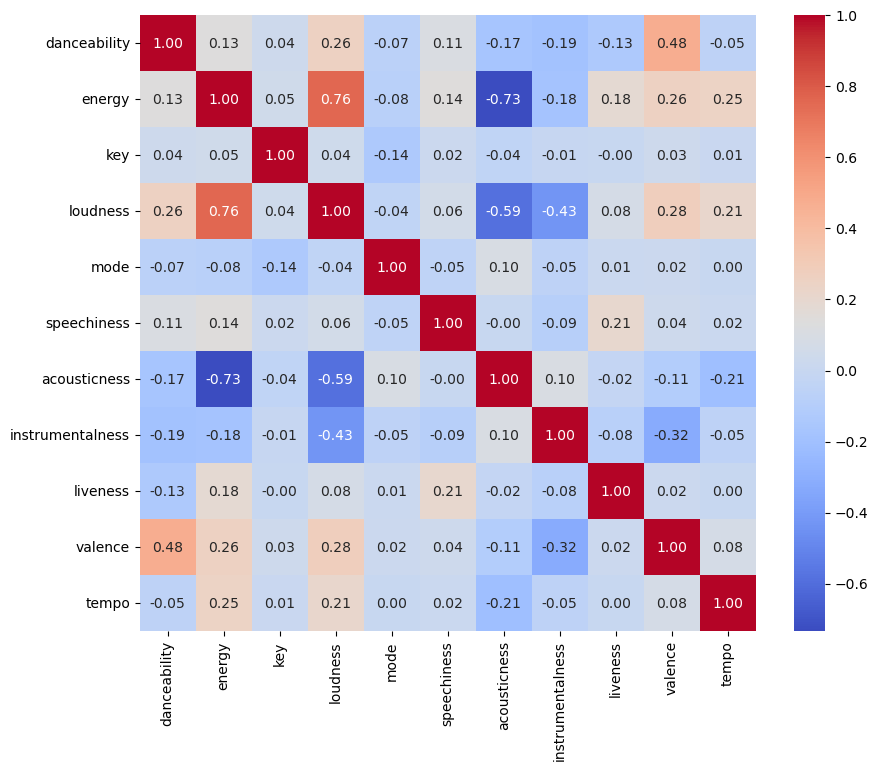

In [29]:
columnas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


# Crea un DataFrame con solo las columnas de interés
df_features = df_spotify[columnas]

# Matriz de correlación
corr_matrix = df_features.corr()

# Crear un heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Mostrar el gráfico
plt.show()



In [30]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [31]:
df_spotify.columns

Index(['Unnamed: 0', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [32]:
df_spotify.dtypes

Unnamed: 0            int64
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [33]:
df_spotify

,Unnamed: 0,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,Michael W. Smith,Change Your World,Friends,41,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [34]:
# Selecciona las características y la variable objetivo
X = df_spotify.drop(['track_genre', 'popularity', 'artists', 'album_name', 'track_name', 'duration_ms'], axis=1)  # características
y = df_spotify['track_genre']  # variable objetivo

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Ajusta y transforma la variable objetivo
y = le.fit_transform(y)

In [36]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el clasificador de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
# Entrena el modelo
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Imprime el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       213
           1       0.93      0.99      0.96       203
           2       0.83      0.84      0.84       215
           3       0.80      0.83      0.81       184
           4       0.93      0.93      0.93       197
           5       0.91      0.85      0.88       193
           6       0.93      0.95      0.94       210
           7       0.91      0.94      0.92       205
           8       0.83      0.75      0.79       214
           9       0.71      0.75      0.73       197
          10       0.83      0.88      0.86       199
          11       0.75      0.74      0.74       214
          12       0.90      0.90      0.90       193
          13       0.89      0.93      0.91       206
          14       0.81      0.74      0.78       214
          15       0.77      0.80      0.79       198
          16       0.88      0.85      0.87       198
          17       0.84    

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cnf_matrix)

Confusion matrix:
[[211   2   0 ...   0   0   0]
 [  0 201   0 ...   0   0   0]
 [  0   2 181 ...   0   0   0]
 ...
 [  0   0   0 ... 181   0   0]
 [  0   0   0 ...   9 174   1]
 [  0   0   0 ...   1   0 187]]


In [39]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [1, 2, 'sqrt'],
    'bootstrap': [True],
    'random_state': [42]
}



In [41]:
random_search = RandomizedSearchCV(clf, param_distributions, n_iter=50, cv=5, scoring='accuracy', n_jobs=2)


In [42]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=2,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 10],
                                        'max_features': [1, 2, 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100],
                                        'random_state': [42]},
                   scoring='accuracy')

In [43]:
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)


Mejores hiperparámetros encontrados: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [44]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Informe de clasificación:\n", classification_report(y_test, y_pred))


Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       213
           1       0.96      0.99      0.97       203
           2       0.92      0.91      0.92       215
           3       0.89      0.90      0.90       184
           4       0.96      0.94      0.95       197
           5       0.94      0.86      0.90       193
           6       0.94      0.95      0.95       210
           7       0.93      0.95      0.94       205
           8       0.88      0.75      0.81       214
           9       0.80      0.79      0.79       197
          10       0.82      0.88      0.85       199
          11       0.84      0.77      0.80       214
          12       0.95      0.92      0.94       193
          13       0.88      0.95      0.91       206
          14       0.88      0.80      0.84       214
          15       0.78      0.84      0.81       198
          16       0.87      0.85      0.86       198


In [45]:
# Realizamos validación cruzada
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores)
print("Precisión media:", cv_scores.mean())
print("Desviación estándar de la precisión:", cv_scores.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.82505482 0.83262061 0.83930921 0.82763158 0.8301442 ]
Precisión media: 0.8309520849144354
Desviación estándar de la precisión: 0.004880197970470591


In [46]:
scaler_X = RobustScaler()

X_scaled = scaler_X.fit_transform(X)

REDES NEURONALES

In [47]:
from sklearn.neural_network import MLPClassifier

# Divide el conjunto de datos escalado en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
# Crea el clasificador de MLP
mlp_clf = MLPClassifier(random_state=42)

In [49]:
# Entrena el modelo con los datos escalados
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(random_state=42)

In [50]:
# Realiza predicciones en el conjunto de prueba escalado
y_pred_mlp = mlp_clf.predict(X_test_scaled)

In [51]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       213
           1       0.89      0.95      0.92       203
           2       0.80      0.95      0.87       215
           3       0.96      0.75      0.84       184
           4       0.93      0.89      0.91       197
           5       0.81      0.91      0.86       193
           6       0.96      0.90      0.93       210
           7       0.93      0.90      0.92       205
           8       0.89      0.80      0.85       214
           9       0.80      0.93      0.86       197
          10       0.89      0.88      0.89       199
          11       0.90      0.88      0.89       214
          12       0.92      0.91      0.91       193
          13       0.89      0.95      0.92       206
          14       0.79      0.82      0.81       214
          15       0.87      0.68      0.76       198
          16       0.85      0.89      0.87       198
          17       0.85    

In [52]:
mlp_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [53]:
from scipy.stats import uniform, loguniform

param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],  # Reducir el número de capas ocultas puede acelerar el entrenamiento
    'activation': ['relu', 'tanh'],  
    'alpha': loguniform(1e-4, 1e-2),  
    'learning_rate': ['constant'],  
    'max_iter': [200, 300],  # Reducir 'max_iter' puede acelerar el entrenamiento, pero no ajustarlo demasiado bajo
}

In [54]:
random_search_mlp = RandomizedSearchCV(mlp_clf, param_distributions=param_dist_mlp, n_iter=5, cv=2, scoring='accuracy', random_state=42, n_jobs=2)

In [55]:
random_search_mlp.fit(X_train_scaled, y_train)

/Users/alexvalles/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexvalles/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexvalles/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexvalles/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alexvalle

RandomizedSearchCV(cv=2, estimator=MLPClassifier(random_state=42), n_iter=5,
                   n_jobs=2,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x130ad5e90>,
                                        'hidden_layer_sizes': [(50,), (100,)],
                                        'learning_rate': ['constant'],
                                        'max_iter': [200, 300]},
                   random_state=42, scoring='accuracy')

In [56]:
best_params_mlp = random_search_mlp.best_params_
print("Mejores parámetros: ", best_params)

Mejores parámetros:  {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [57]:
# Ajusta el modelo con los mejores parámetros encontrados
best_mlp = random_search_mlp.best_estimator_
best_mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', alpha=0.00012966511753760416, max_iter=300,
              random_state=42)

In [58]:
y_pred_mlp = best_mlp.predict(X_test_scaled)

In [59]:
report_mlp = classification_report(y_test, y_pred_mlp)
print("Informe de clasificación: \n", report_mlp)

Informe de clasificación: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       213
           1       0.84      0.87      0.86       203
           2       0.90      0.64      0.75       215
           3       0.68      0.97      0.80       184
           4       0.92      0.84      0.88       197
           5       0.87      0.84      0.85       193
           6       0.91      0.94      0.93       210
           7       0.85      0.89      0.87       205
           8       0.82      0.71      0.77       214
           9       0.77      0.82      0.79       197
          10       0.86      0.89      0.87       199
          11       0.86      0.76      0.81       214
          12       0.79      0.88      0.84       193
          13       0.88      0.93      0.91       206
          14       0.76      0.79      0.77       214
          15       0.77      0.71      0.74       198
          16       0.88      0.88      0.88       198

In [60]:
# Realizamos validación cruzada
cv_scores_mlp = cross_val_score(best_mlp, X_train_scaled, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_mlp)
print("Precisión media:", cv_scores_mlp.mean())
print("Desviación estándar de la precisión:", cv_scores_mlp.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.84588816 0.85279605 0.85241228 0.84089912 0.84840178]
Precisión media: 0.8480794780896537
Desviación estándar de la precisión: 0.004415484487026178


In [61]:

# Obtiene los pesos de la primera capa
weights = mlp_clf.coefs_[0]

# Imprime los pesos
for i, feature in enumerate(X.columns):
    print(f"Peso de la característica {feature}: {weights[i]}")


Peso de la característica Unnamed: 0: [ 6.71881619e-01  6.11697122e+00  3.98887100e-01  3.53640354e+00
 -4.00381189e+00 -1.86314174e+00 -1.06130298e+01  1.27379721e-02
  9.53608609e-01  6.78674043e+00 -2.20627109e+01  9.19500605e+00
  2.38930854e+00 -6.11949477e-02 -3.55170131e-01 -5.98147128e+00
  2.61583644e+00  6.69207605e+00 -1.03690977e+00 -7.35504898e+00
 -1.03210631e+00 -6.95871491e+00 -3.11232591e+00 -6.77343109e+00
  1.05437178e+00  1.79438784e+01  6.45236756e-01  4.91840143e+00
  5.12325848e-02 -5.70102206e+00  3.68808550e+00 -3.95054657e+00
 -8.01475587e-01  5.82493757e+00  5.61203484e+00  6.95743124e+00
  4.91619808e-01 -3.30288893e+00 -1.34131974e-01 -2.78709221e-01
 -5.88832844e+00 -9.35913498e-01 -5.21198035e+00  1.30932051e+01
 -2.56244470e+00  4.59724201e+00 -2.37160693e+00 -7.29567899e-01
  8.50996730e+00 -2.51479086e+00  5.21151400e+00  4.64154628e+00
  6.45771410e+00  1.57919253e+01  2.98422974e-01  6.01121984e+00
 -4.60755057e+00 -4.36225374e+00 -1.69497700e+01 -2.

Pesos positivos vs negativos: Un peso positivo indica que a medida que la característica de entrada aumenta, la activación de la neurona tiende a aumentar, mientras que un peso negativo indica que a medida que la característica de entrada aumenta, la activación de la neurona tiende a disminuir.
Magnitud de los pesos: La magnitud de los pesos puede dar una idea de la importancia de una característica. Un peso con una magnitud grande (ya sea positivo o negativo) indica que la característica tiene un fuerte efecto en la activación de la neurona, mientras que un peso con una magnitud pequeña indica que la característica tiene un efecto menor.
Interacciones complejas: En una red neuronal, especialmente en las que tienen muchas capas (redes profundas), los pesos de la primera capa no cuentan toda la historia. Una característica puede tener un peso pequeño en la primera capa, pero aún así ser muy importante si interactúa con otras características en capas posteriores.
Normalización de características: Si tus características están normalizadas (por ejemplo, tienen media 0 y desviación estándar 1), entonces puedes comparar los pesos directamente. Si no están normalizadas, entonces un peso grande puede ser simplemente el resultado de que la característica correspondiente tiene una escala pequeña.

SVM

In [62]:
# Divide el conjunto de datos escalado en conjuntos de entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
# Crea el clasificador SVM
svm_clf = SVC(random_state=42)

In [64]:
# Entrena el modelo con los datos escalados
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [65]:
# Realiza predicciones en el conjunto de prueba escalado
y_pred_svm = svm_clf.predict(X_test_scaled)


In [66]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49       213
           1       0.51      0.45      0.48       203
           2       0.25      0.45      0.32       215
           3       0.19      0.20      0.20       184
           4       0.50      0.63      0.56       197
           5       0.30      0.08      0.12       193
           6       0.60      0.72      0.66       210
           7       0.45      0.48      0.46       205
           8       0.32      0.21      0.26       214
           9       0.39      0.25      0.30       197
          10       0.37      0.29      0.33       199
          11       0.26      0.02      0.04       214
          12       0.35      0.69      0.46       193
          13       0.41      0.37      0.39       206
          14       0.37      0.36      0.37       214
          15       0.39      0.30      0.34       198
          16       0.51      0.58      0.55       198
          17       0.30    

KNN CLASSIFIER

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

In [68]:
# entrenamos el modelo

knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [69]:
# Realiza predicciones en el conjunto de prueba
y_pred_knn = knn_clf.predict(X_test_scaled)

In [70]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.20      0.31      0.25       213
           1       0.24      0.36      0.29       203
           2       0.16      0.26      0.20       215
           3       0.25      0.32      0.28       184
           4       0.33      0.49      0.40       197
           5       0.19      0.24      0.21       193
           6       0.32      0.41      0.36       210
           7       0.30      0.46      0.36       205
           8       0.23      0.26      0.24       214
           9       0.09      0.13      0.11       197
          10       0.20      0.27      0.23       199
          11       0.12      0.09      0.10       214
          12       0.22      0.29      0.25       193
          13       0.29      0.43      0.35       206
          14       0.31      0.24      0.27       214
          15       0.24      0.25      0.25       198
          16       0.34      0.38      0.36       198
          17       0.12    

In [71]:

num_generos_unicos = df_spotify['track_genre'].nunique()
print(f'Hay {num_generos_unicos} géneros diferentes.')

Hay 114 géneros diferentes.


AHORA HAREMOS PREDICCIONES EN OTRO DATASET

In [128]:
df_spotify2 = pd.read_csv('/Users/alexvalles/tracks_features.csv')

df_spotify2

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [129]:
# Reemplazar los corchetes y comillas en la columna 'artists'
df_spotify2['artists'] = df_spotify2['artists'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))

# Mostrar el DataFrame después de la modificación
df_spotify2.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [130]:
df_spotify2['time_signature'] = df_spotify2['time_signature'].round().astype(int)

df_spotify2.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999,1999-11-02


In [131]:
df_spotify2.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
year                  int64
release_date         object
dtype: object

In [132]:
df_spotify2.isnull().sum()

id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64

In [133]:
filas_nulos = df_spotify2.isnull().any(axis=1)

# Mostrar las filas con al menos un valor nulo
print("Filas con al menos un valor nulo:")
df_spotify2[filas_nulos]

Filas con al menos un valor nulo:


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
387109,7r3l7R0Ob1XcRk6woND7It,NaN,Distort Neural Unit,490Mh7XZ2RMAdUFLyIeIjk,K-Bereit,['0AlkK3VjSA5wwDVO382B0y'],1,1,False,0.581,...,0.0353,0.00114,0.412000,0.3620,0.117,120.025,282840,4,2009,2009-01-01
869543,0Ii9PaRffU4y8Tg1qMfV92,NaN,Hard to Hit,15nI3HMMle3zSsrVNUjdRM,"Big Mike, Yukmouth, ""Tremendous""","['2NeBwEmM7I71IsGl1y6FG0', '0ndMofuAPmTktjONZv...",19,1,True,0.890,...,0.2590,0.00243,0.000002,0.0849,0.359,100.045,230293,4,1999,1999-05-25
1018344,5dQ6x9vR5gaxIQFAqFTGhN,NaN,NaN,0FuahJaNlb2xX87G54NSLj,Gupi,['3YOvdmjSEwOqRAJ0ttfwCx'],1,1,False,0.630,...,0.0637,0.09820,0.678000,0.0964,0.826,140.011,246337,4,2020,2020-02-25
1018345,44DdlS9pHh9FPnd8Kl6P6u,Modest,NaN,0FuahJaNlb2xX87G54NSLj,Gupi,['3YOvdmjSEwOqRAJ0ttfwCx'],2,1,False,0.729,...,0.0503,0.04300,0.000013,0.1230,0.947,117.033,182126,4,2020,2020-02-25
1018346,0e1GhxlLVzjKC2OMJR4xgO,Paradise,NaN,0FuahJaNlb2xX87G54NSLj,Gupi,['3YOvdmjSEwOqRAJ0ttfwCx'],3,1,False,0.640,...,0.1500,0.00608,0.607000,0.1100,0.841,170.010,197836,4,2020,2020-02-25
1018347,4ZF0yCc8yqid53tv9pCgm5,Spencer Adventure 2,NaN,0FuahJaNlb2xX87G54NSLj,Gupi,['3YOvdmjSEwOqRAJ0ttfwCx'],4,1,False,0.565,...,0.2530,0.06620,0.762000,0.1020,0.689,149.943,171165,4,2020,2020-02-25
1018348,64mmh0EoR0n5ROKQZZB5hT,Plymouth Simulation,NaN,0FuahJaNlb2xX87G54NSLj,Gupi,['3YOvdmjSEwOqRAJ0ttfwCx'],5,1,False,0.703,...,0.2550,0.03360,0.579000,0.0620,0.901,170.055,186272,4,2020,2020-02-25
1018349,51IvHGlNqG8jIEEDiJuJyZ,Driving Directly Into A Concrete Wall,NaN,0FuahJaNlb2xX87G54NSLj,Gupi,['3YOvdmjSEwOqRAJ0ttfwCx'],6,1,False,0.740,...,0.1620,0.22100,0.121000,0.3600,0.935,139.977,202566,4,2020,2020-02-25
1018350,52rpjws4EuaZcsKcNN9m25,Regression,NaN,0FuahJaNlb2xX87G54NSLj,Gupi,['3YOvdmjSEwOqRAJ0ttfwCx'],7,1,False,0.680,...,0.0909,0.00110,0.831000,0.3330,0.861,142.959,188156,4,2020,2020-02-25
1018351,6pe1T2thmWds9hPq67Xv74,Thos Moser,NaN,0FuahJaNlb2xX87G54NSLj,"Gupi, Fraxiom, food house","['3YOvdmjSEwOqRAJ0ttfwCx', '04Y5zXsFqYRzDr6tMX...",8,1,True,0.766,...,0.2090,0.03050,0.000222,0.0836,0.619,134.981,263364,4,2020,2020-02-25


In [134]:
df_spotify2 = df_spotify2.dropna()

In [135]:
df_spotify2

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4,2014,2014-01-09


In [136]:
columnas_a_eliminar = ['album_id', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'release_date', 'duration_ms', 'id']

df_spotify2 = df_spotify2.drop(columnas_a_eliminar, axis=1)

In [137]:
df_spotify2.head()

,name,album,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,Testify,The Battle Of Los Angeles,Rage Against The Machine,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4,1999
1,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4,1999
3,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4,1999


In [138]:
df_spotify2.reset_index(inplace=True)

In [139]:
df_spotify2.rename(columns={'index': 'Unnamed: 0'}, inplace=True)

In [140]:
df_spotify2

,Unnamed: 0,name,album,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,0,Testify,The Battle Of Los Angeles,Rage Against The Machine,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4,1999
1,1,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4,1999
2,2,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4,1999
3,3,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4,1999
4,4,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204007,1204020,Gospel of Juke,Notch - EP,FVLCRVM,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,4,2014
1204008,1204021,Prism Visions,Notch - EP,FVLCRVM,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,4,2014
1204009,1204022,Tokyo 360,Notch - EP,FVLCRVM,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,4,2014
1204010,1204023,Yummy!,Notch - EP,FVLCRVM,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,4,2014


In [141]:
X_2 = df_spotify2.drop(['name', 'album', 'artists', 'year'], axis=1)

In [142]:
X_2

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4
1,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4
2,2,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4
3,3,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4
4,4,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204007,1204020,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,4
1204008,1204021,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,4
1204009,1204022,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,4
1204010,1204023,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,4


In [143]:
def preprocesar(X_2):
    scaler = RobustScaler()
    X_2_scaled = scaler.fit_transform(X_2)
    return X_2_scaled

In [144]:
X_2_preprocesado = preprocesar(X_2)
generos_predichos = best_mlp.predict(X_2_preprocesado)


In [145]:
generos_predichos

array([  0,   0,   1, ..., 112, 112, 112])

In [155]:
# Añade las predicciones como una nueva columna en tu dataframe
X_2['genero_predicho'] = generos_predichos

In [156]:
X_2_preprocesado

array([[-0.99999834, -0.11191336,  0.88326848, ...,  0.22075055,
         0.02744697,  0.        ],
       [-0.99999668,  0.35379061,  0.84241245, ...,  0.18984547,
        -0.3034518 ,  0.        ],
       [-0.99999502, -0.67148014,  0.86770428, ..., -0.07284768,
         0.76811965,  0.        ],
       ...,
       [ 1.00001329,  1.02527076,  0.52918288, ...,  0.14128035,
         0.12258095,  0.        ],
       [ 1.00001495,  0.59205776,  0.6459144 , ..., -0.38852097,
         0.19212877,  0.        ],
       [ 1.00001661,  0.84837545,  0.35797665, ..., -0.4392936 ,
         0.02942408,  0.        ]])

In [160]:
# Supongamos que 'df_original' es tu dataframe original que contiene las columnas 'artists', 'name', 'album'
# Primero, selecciona solo las columnas que quieres añadir de tu dataframe original
df_added = df_spotify2[['name', 'album', 'artists', 'year']]

df_final = X_2.merge(df_added, left_index=True, right_index=True)



In [161]:
df_final

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero_predicho,name,album,artists,year
0,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4,0,Testify,The Battle Of Los Angeles,Rage Against The Machine,1999
1,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4,0,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,1999
2,2,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4,1,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,1999
3,3,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4,1,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,1999
4,4,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4,0,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204007,1204020,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,4,113,Gospel of Juke,Notch - EP,FVLCRVM,2014
1204008,1204021,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,4,112,Prism Visions,Notch - EP,FVLCRVM,2014
1204009,1204022,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,4,112,Tokyo 360,Notch - EP,FVLCRVM,2014
1204010,1204023,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,4,112,Yummy!,Notch - EP,FVLCRVM,2014


In [151]:
# Imprime las etiquetas de clase originales
print(le.classes_)


['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'r-n-b' 'reggae'
 'reggaeton' 'rock' 'rock-n-roll' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [152]:
# Imprime las etiquetas de clase originales junto con su correspondiente etiqueta numérica
for i, genero in enumerate(le.classes_):
    print(f"{genero}: {i}")


acoustic: 0
afrobeat: 1
alt-rock: 2
alternative: 3
ambient: 4
anime: 5
black-metal: 6
bluegrass: 7
blues: 8
brazil: 9
breakbeat: 10
british: 11
cantopop: 12
chicago-house: 13
children: 14
chill: 15
classical: 16
club: 17
comedy: 18
country: 19
dance: 20
dancehall: 21
death-metal: 22
deep-house: 23
detroit-techno: 24
disco: 25
disney: 26
drum-and-bass: 27
dub: 28
dubstep: 29
edm: 30
electro: 31
electronic: 32
emo: 33
folk: 34
forro: 35
french: 36
funk: 37
garage: 38
german: 39
gospel: 40
goth: 41
grindcore: 42
groove: 43
grunge: 44
guitar: 45
happy: 46
hard-rock: 47
hardcore: 48
hardstyle: 49
heavy-metal: 50
hip-hop: 51
honky-tonk: 52
house: 53
idm: 54
indian: 55
indie: 56
indie-pop: 57
industrial: 58
iranian: 59
j-dance: 60
j-idol: 61
j-pop: 62
j-rock: 63
jazz: 64
k-pop: 65
kids: 66
latin: 67
latino: 68
malay: 69
mandopop: 70
metal: 71
metalcore: 72
minimal-techno: 73
mpb: 74
new-age: 75
opera: 76
pagode: 77
party: 78
piano: 79
pop: 80
pop-film: 81
power-pop: 82
progressive-house: 83
p

In [153]:
df_final.head(40)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero_predicho,name,album,artists,year
0,0,0.470,0.978,7,-5.399,1,0.0727,0.026100,0.000011,0.3560,0.503,117.906,4,0,Testify,The Battle Of Los Angeles,Rage Against The Machine,1999
1,1,0.599,0.957,11,-5.764,1,0.1880,0.012900,0.000071,0.1550,0.489,103.680,4,0,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,1999
2,2,0.315,0.970,7,-5.424,1,0.4830,0.023400,0.000002,0.1220,0.370,149.749,4,1,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,1999
3,3,0.440,0.967,11,-5.830,0,0.2370,0.163000,0.000004,0.1210,0.574,96.752,4,1,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,1999
4,4,0.426,0.929,2,-6.729,1,0.0701,0.001620,0.105000,0.0789,0.539,127.059,4,0,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,1999
5,5,0.298,0.848,2,-5.947,1,0.0727,0.053800,0.001520,0.2010,0.194,148.282,4,0,Born of a Broken Man,The Battle Of Los Angeles,Rage Against The Machine,1999
6,6,0.417,0.976,9,-6.032,1,0.1750,0.000427,0.000134,0.1070,0.483,90.395,4,0,Born As Ghosts,The Battle Of Los Angeles,Rage Against The Machine,1999
7,7,0.277,0.873,11,-6.571,0,0.0883,0.006940,0.000054,0.1880,0.618,172.848,4,0,Maria,The Battle Of Los Angeles,Rage Against The Machine,1999
8,8,0.441,0.882,7,-7.363,1,0.0440,0.019500,0.006840,0.1500,0.418,83.371,4,0,Voice of the Voiceless,The Battle Of Los Angeles,Rage Against The Machine,1999
9,9,0.448,0.861,9,-6.120,1,0.0676,0.003060,0.000000,0.0987,0.761,92.777,4,0,New Millennium Homes,The Battle Of Los Angeles,Rage Against The Machine,1999


In [ ]:
from sklearn.cluster import KMeans

# Seleccionamos las características numéricas para el modelo
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'year']
df_num = sampled_data[features]

# Creamos el modelo de KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustamos el modelo a nuestros datos
kmeans.fit(df_num)

# Obtenemos las etiquetas de los clusters para cada canción
sampled_data['cluster'] = kmeans.labels_

# Ahora cada canción en tu dataframe tiene una etiqueta de cluster asociada
print(sampled_data.head())


NameError: name 'sampled_data' is not defined

In [ ]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd



# Seleccionamos las características numéricas para el modelo
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'year']
df_num = sampled_data[features]

# Creamos el modelo
model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
model.fit(df_num)

# Función para obtener recomendaciones
def get_recommendations(song_index):
    distances, indices = model.kneighbors(df_num.iloc[song_index].values.reshape(1, -1))
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recomendaciones para {0}:\n'.format(sampled_data['name'].iloc[song_index]))
        else:
            print('{0}: {1}, con distancia de {2}'.format(i, sampled_data['name'].iloc[indices.flatten()[i]], distances.flatten()[i]))

# Obtén recomendaciones para una canción
get_recommendations(0)



Recomendaciones para Uncut Funk:

1: Infinite Canon, con distancia de 1.6172626801041232
2: mvt. 4, con distancia de 1.8781947896549587
3: Capriccio espagnol, Op. 34 (arr. W. Kanengiser): III. Alborada, con distancia de 1.879894082069357
4: The First Booke of Balletts to Five Voyces: No. 11. Now is the Month of Maying (arr. P. Snedecor): Now is the Month of Maying (arr. for brass ensemble), con distancia de 1.887287473720883


In [ ]:
sampled_data

,name,album,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
10617,Uncut Funk,Jams From The Heart,Eddie Hazel,-0.299639,-0.365759,0.666667,-2.386436,0.0,0.806452,0.013359,1.362907,0.249663,0.633554,0.094901,0.000000,1994
979192,I'm Your Next Opponent (Miniboss),Grapple Force Rena (Original Game Soundtrack),Jarad Moloney,-0.411552,0.811284,-0.333333,0.423568,0.0,0.241935,-0.471120,1.173754,0.040486,0.975717,0.773190,0.000000,2019
823431,This Christmas,I'll Be Home for Christmas,Joe Gransden,0.415162,0.066148,-0.333333,0.271758,0.0,0.008065,0.310906,-0.008790,-0.336032,0.867550,-0.465156,0.000000,2006
474970,10 Ghosts II,Ghosts I-IV,Nine Inch Nails,0.837545,0.245136,0.000000,0.333021,0.0,-0.311828,-0.304834,1.190444,-0.414305,-0.216336,-0.341808,0.000000,2008
481679,Cumbia De La Sierra,In The Land Of The Nahuatl,Sirius Coyote,1.018051,-0.256809,-0.833333,0.087150,0.0,0.747312,0.569590,0.000960,-0.199730,0.801325,0.265235,0.000000,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424975,Crestside Funk,The Rompalation... Best Of Vol. 1,"""DaUndaDogg""",0.570397,0.525292,-0.166667,0.167389,-1.0,1.177419,-0.452635,-0.011238,2.267206,0.419426,-0.457434,0.000000,2003
894583,The Story Begins,God of Rakhsh,Hooshyar Khayam,-0.158845,-0.834047,0.166667,-1.856858,-1.0,-0.411290,0.733544,1.219651,-0.141700,-0.289183,-0.435686,0.000000,2018
1094133,Beast,My Finest Hour,Marty Macphly,0.711191,0.466926,-0.166667,0.271993,0.0,10.521505,-0.241681,-0.011238,1.396761,0.626932,1.382443,0.000000,2020
394216,The Dambusters: March: 'The Dam Busters',Eric Coates: The Dam Busters / London Suite,"Eric Coates, Slovak Radio Symphony Orchestra",-0.754513,-0.752918,-0.833333,-1.252431,0.0,-0.131720,0.665533,1.314228,0.823212,-0.068433,0.733718,0.000000,1993


In [ ]:

from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Seleccionamos las características numéricas para el modelo
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'year']
df_num = sampled_data[features]

# Creamos el modelo
model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
model.fit(df_num)

def get_song_recommendations(song_title, model, df_num, sampled_data):
    # Buscamos la canción en el dataframe
    song = sampled_data[sampled_data['name'] == song_title]
    
    if not song.empty:
        # Obtenemos el índice de la canción
        song_index = song.index[0]
        
        # Usamos la función get_recommendations para obtener las recomendaciones
        get_recommendations(song_index, model, df_num, sampled_data)
    else:
        print('La canción "{0}" no se encuentra en el dataset.'.format(song_title))

# Ahora puedes introducir el título de la canción directamente
get_song_recommendations('This Christmas', model, df_num, sampled_data)









IndexError: index 0 is out of bounds for axis 0 with size 0

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

# variables relevantes para la recomendación
features_df = sampled_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Calcular la matriz de similitud euclidiana o de similitud coseno
# Puedes elegir entre euclidean_distances o cosine_similarity según tus necesidades
similarity_matrix = cosine_similarity(scaled_features, scaled_features)

# Crear un DataFrame de similitud para facilitar la manipulación
similarity_df = pd.DataFrame(similarity_matrix, index=scaled_features['name'], columns=scaled_features['name'])

# Función para obtener las recomendaciones para una canción dada
def get_recommendations(song_name, similarity_df, n=5):
    song_similarity = similarity_df[song_name]
    similar_songs = song_similarity.sort_values(ascending=False)[1:n+1]
    return similar_songs

# Ejemplo de recomendaciones para la canción 'Testify'
recommendations = get_recommendations('10 Ghosts II', similarity_df)
print(recommendations)

LIBRERIA DASK - MIRAR SEGURAMENTE OPTIMICE LA CARGA DE DATASETS DE GRAN TAMAÑO